In [6]:
import pandas as pd
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# To plot pretty figures
%matplotlib inline

In [7]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Load Data

In [8]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
# NAN values in total_bedrooms
housing['total_bedrooms'].isnull().any()

True

In [25]:
# Count category column
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Viz

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2caa2024d0>,
      dtype=object)

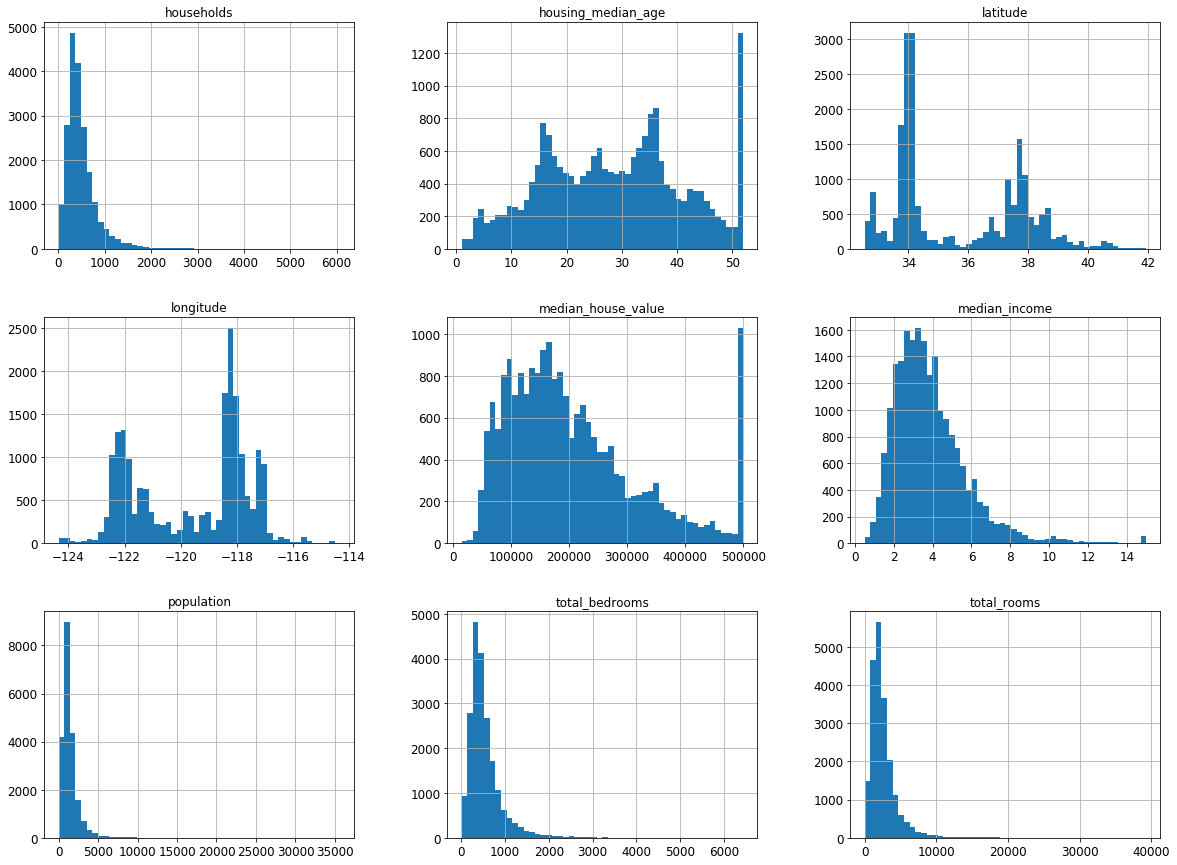

In [28]:
housing.hist(bins=50, figsize=(20, 15))

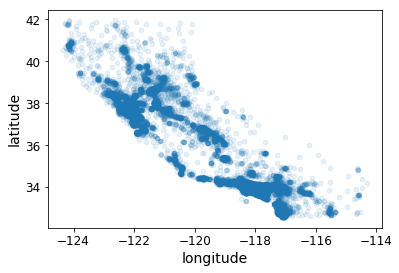

In [36]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

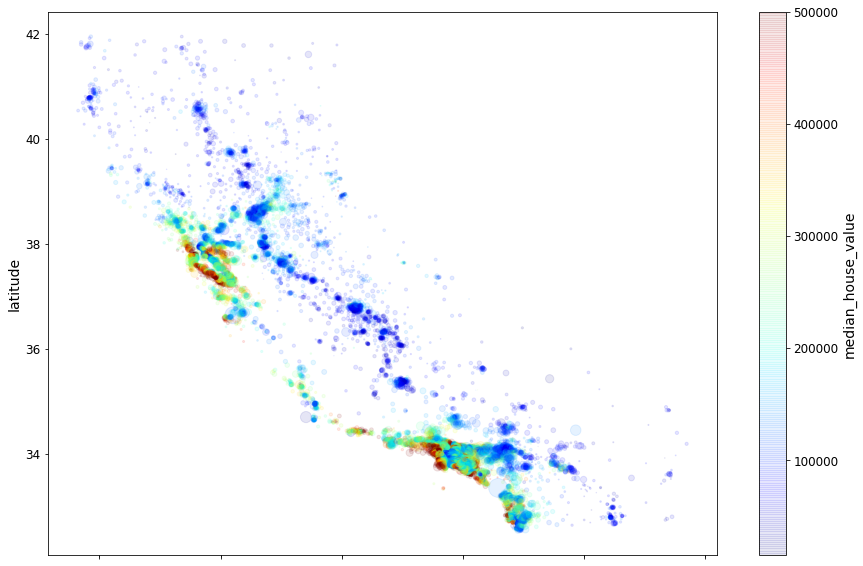

In [44]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    s=housing['population']/100,
    alpha=0.1,
    figsize=(15, 10),
    c='median_house_value',
    cmap=plt.get_cmap('jet')
)

In [50]:
corr_matrix = housing.corr()

In [58]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c67b921d0>,
      dtype=object)

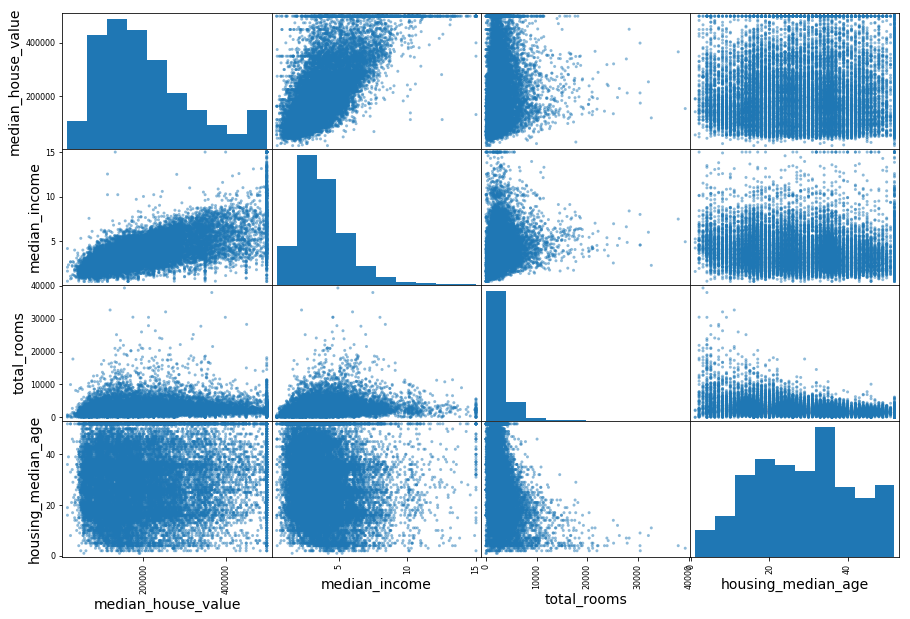

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']],
    figsize=(15, 10))


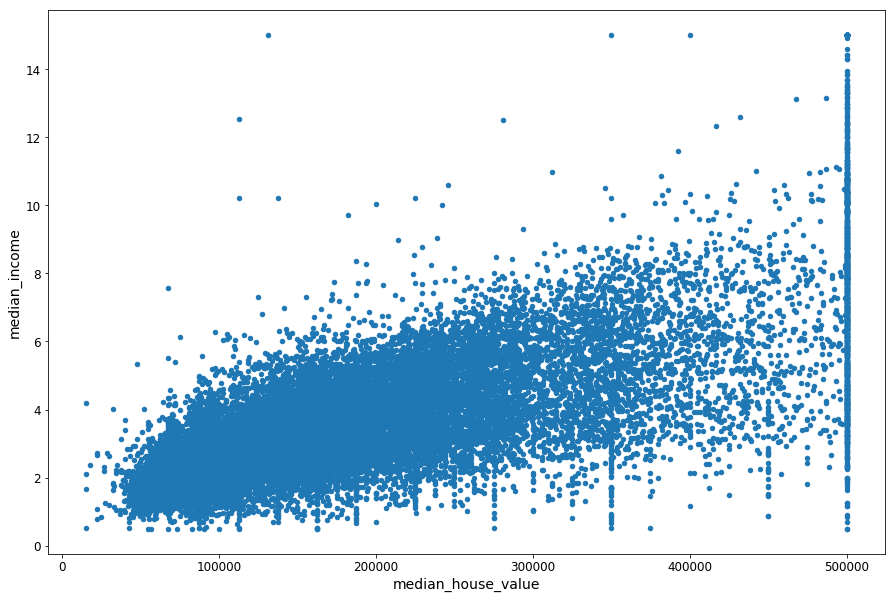

In [64]:
housing.plot(kind='scatter', x='median_house_value', y='median_income', figsize=(15, 10))

In [65]:
housing.columns

Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
       u'total_bedrooms', u'population', u'households', u'median_income',
       u'median_house_value', u'ocean_proximity'],
      dtype='object')

In [69]:
housing['rooms_per_households'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['populate_per_households'] = housing['population'] / housing['households']


In [72]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
rooms_per_households       0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
populate_per_households   -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedrooms_per_rooms        -0.255880
Name: median_house_value, dtype: float64

In [75]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [79]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [80]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                  20640 non-null float64
latitude                   20640 non-null float64
housing_median_age         20640 non-null float64
total_rooms                20640 non-null float64
total_bedrooms             20433 non-null float64
population                 20640 non-null float64
households                 20640 non-null float64
median_income              20640 non-null float64
median_house_value         20640 non-null float64
bedrooms_per_rooms         20433 non-null float64
rooms_per_households       20640 non-null float64
populate_per_households    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [83]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [87]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                  20640 non-null float64
latitude                   20640 non-null float64
housing_median_age         20640 non-null float64
total_rooms                20640 non-null float64
total_bedrooms             20433 non-null float64
population                 20640 non-null float64
households                 20640 non-null float64
median_income              20640 non-null float64
median_house_value         20640 non-null float64
bedrooms_per_rooms         20433 non-null float64
rooms_per_households       20640 non-null float64
populate_per_households    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [88]:
 X = imputer.transform(housing_num)

In [89]:
X

array([[-122.23      ,   37.88      ,   41.        , ...,    0.14659091,
           6.98412698,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    0.15579659,
           6.23813708,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    0.12951602,
           8.28813559,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    0.21517303,
           5.20554273,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    0.21989247,
           5.32951289,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    0.22118492,
           5.25471698,    2.61698113]])

In [92]:
housing_trx = pd.DataFrame(X, columns=housing_num.columns)
housing_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                  20640 non-null float64
latitude                   20640 non-null float64
housing_median_age         20640 non-null float64
total_rooms                20640 non-null float64
total_bedrooms             20640 non-null float64
population                 20640 non-null float64
households                 20640 non-null float64
median_income              20640 non-null float64
median_house_value         20640 non-null float64
bedrooms_per_rooms         20640 non-null float64
rooms_per_households       20640 non-null float64
populate_per_households    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [93]:
housing_cat = housing['ocean_proximity']

In [94]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [96]:
housing_cat_encoded, housing_categories

(array([0, 0, 0, ..., 2, 2, 2]),
 Index([u'NEAR BAY', u'<1H OCEAN', u'INLAND', u'NEAR OCEAN', u'ISLAND'], dtype='object'))

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_)